In [ ]:
import numpy as np
import pandas as pd

## Reading Dataset

For reading the dataset we will be using pandas library.
Pandas is a python package which is basically used to handel and clean the data. We read the dataset as [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 
To read the csv file as pandas DataFrame, we take help of [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method of the Pandas DataFrame.



In [ ]:
df = pd.read_csv("/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

In [ ]:
# head shows the first few rows (by-default 5) of the DataFrame 
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [ ]:
# tail shows the last  few rows (by-default 5) of the DataFrame 
df.tail(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


This time just for simplicity, we will only focus on the Open Value of the stock and will ignore all other values.

> **Note:** In our case the dataset is already sorted out based on the dates, but if it is not sorted, we need to sort the data based on the date first.

In [ ]:
df = df['Open']
df.head()

0    42120
1    43000
2    43940
3    43140
4    43310
Name: Open, dtype: int64

## Ploting the time series

For plotting any data we generally take help of the [matplotlib library](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

In [ ]:
# Creating a function  to plot the time series

import matplotlib.pyplot as plt

def plot_series(data):
  '''
  The function plot the time-series data passed on to the function.
  INPUT:
   - data: List of the time series data to plot 
  RETURN:
   None
  '''

  for df in data:
    plt.plot(df)
  plt.show()

## Splitting the dataset in Test and Train set

We always train the model on some data called "train dataset", but while testing the performance of the model, we always do that on some other data which was not used in for the training.

In [ ]:
# Let's just use 80% of the whole dataset that we have for training and the rest for testing

train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

## Reshaping the data into the required form to be fed into the RNN

In [ ]:
def arrange(data, window=10):
  '''
  The function rearrang the data into a suitable format to be fed into the RNN

  INPUT:
   - data: the dataset to be reshaped
   - window: number of past points to be taken into account while making the next prediction

  OUTPUT:
   - Returns two list as input sequence (x) and the target value (y)
  '''
  x = []
  y = []

  # Loop through the data
  for i, val in enumerate(data):
    if i<window:  
      # if there are not enough number of records available in the past, then continue
      continue
    x.append((data[i-window: i-1]).reshape(-1,1))
    y.append(data[i].reshape(-1,1))

  # convert the list into numpy array
  # NOTE: It's not a necessary step, but it's generally used as numpy array do the computations faster than the python list
  x = np.asarray(x)
  y = np.asarray(y)

  return x,y

In [ ]:
X_train, y_train = arrange(train, 15)

print("x-shape is: {} and y-shape is: {}".format(X_train.shape, y_train.shape))

x-shape is: (965, 14, 1) and y-shape is: (965, 1, 1)


In [ ]:
# Let's see how a data point looks like
print(X_train[0])
print(y_train[0])

[[42120]
 [43000]
 [43940]
 [43140]
 [43310]
 [43660]
 [43900]
 [42910]
 [42790]
 [43350]
 [43440]
 [43300]
 [43130]
 [43950]]
[[41480]]


As you can see X[0] is a sequence of 14 input-values and y is the target 15th value 

## Building the Model

Now that we have our dataset ready, it's time to build the model.

To build the model, we are gonna use tensorflow. Tensorflow is open source library by google, used for building the Neural Networks. It is a very powerfull library and make our code so easy to write. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

In [ ]:
Net = Sequential()
Net.add(SimpleRNN(3, activation='relu', input_shape=X_train.shape[1:]))
Net.add(Dense(1, activation = 'relu'))

Net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Net.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
Net.fit(X_train, y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 0s 5ms/step - loss: 160898704.0000 - mse: 160898704.0000
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 30275346.0000 - mse: 30275346.0000
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 2436452.7500 - mse: 2436452.7500
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 2102544.0000 - mse: 2102544.0000
Epoch 5/10
31/31 [==============================] - 0s 5ms/step - loss: 2060192.5000 - mse: 2060192.5000
Epoch 6/10
31/31 [==============================] - 0s 6ms/step - loss: 2066148.3750 - mse: 2066148.3750
Epoch 7/10
31/31 [==============================] - 0s 5ms/step - loss: 2063589.0000 - mse: 2063589.0000
Epoch 8/10
31/31 [==============================] - 0s 5ms/step - loss: 2064338.8750 - mse: 2064338.8750
Epoch 9/10
31/31 [==============================] - 0s 5ms/step - loss: 2069408.3750 - mse: 2069408.3750
Epoch 10/10
31/31 [==============================

In [ ]:
X_test, y_test = arrange(test, 15)
pred = Net.predict(X_test)
pred[:,0]

array([19320.377, 19006.06 , 19049.826, 18866.4  , 18777.234, 18624.332,
       18564.592, 18287.006, 18208.924, 17984.9  , 17842.889, 17632.172,
       17555.666, 17319.986, 17115.207, 17011.75 , 16994.803, 16876.875,
       16976.201, 17032.166, 17219.307, 17237.115, 17277.223, 17422.803,
       17492.963, 17667.24 , 17701.34 , 17802.498, 17815.99 , 17604.271,
       17369.44 , 17301.307, 17082.287, 17093.748, 16835.98 , 16639.264,
       16397.623, 16297.85 , 16489.219, 17037.604, 17471.29 , 17834.291,
       17946.303, 18048.334, 17856.736, 17831.441, 17944.123, 18062.13 ,
       18029.697, 18070.451, 18052.51 , 18011.127, 18098.225, 18026.607,
       17815.22 , 18183.002, 18222.637, 18254.592, 18181.945, 18082.588,
       18069.799, 18118.611, 17973.953, 17974.725, 18050.76 , 18113.66 ,
       18054.26 , 18272.053, 18286.66 , 18355.307, 18255.947, 18218.771,
       18146.393, 18035.72 , 17986.994, 17974.451, 17956.92 , 17726.12 ,
       17616.781, 17443.203, 17353.322, 17399.596, 

## Comparing predictions with the actual value using the plot

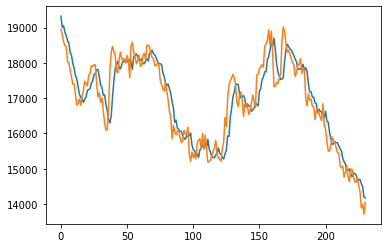

In [ ]:
plot_series([pred[:,0], y_test[:,:,0]])

The plot in blue represents the prdicted value by the model, while the plot in orange represents the actual value